[[5.1, 3.5, 0.0], [4.9, 3.0, 0.0], [4.7, 3.2, 0.0], [4.6, 3.1, 0.0], [5.0, 3.6, 0.0], [5.4, 3.9, 0.0], [4.6, 3.4, 0.0], [5.0, 3.4, 0.0], [4.4, 2.9, 0.0], [4.9, 3.1, 0.0], [5.4, 3.7, 0.0], [4.8, 3.4, 0.0], [4.8, 3.0, 0.0], [4.3, 3.0, 0.0], [5.8, 4.0, 0.0], [5.7, 4.4, 0.0], [5.4, 3.9, 0.0], [5.1, 3.5, 0.0], [5.7, 3.8, 0.0], [5.1, 3.8, 0.0], [5.4, 3.4, 0.0], [5.1, 3.7, 0.0], [4.6, 3.6, 0.0], [5.1, 3.3, 0.0], [4.8, 3.4, 0.0], [5.0, 3.0, 0.0], [5.0, 3.4, 0.0], [5.2, 3.5, 0.0], [5.2, 3.4, 0.0], [4.7, 3.2, 0.0], [4.8, 3.1, 0.0], [5.4, 3.4, 0.0], [5.2, 4.1, 0.0], [5.5, 4.2, 0.0], [4.9, 3.1, 0.0], [5.0, 3.2, 0.0], [5.5, 3.5, 0.0], [4.9, 3.6, 0.0], [4.4, 3.0, 0.0], [5.1, 3.4, 0.0], [5.0, 3.5, 0.0], [4.5, 2.3, 0.0], [4.4, 3.2, 0.0], [5.0, 3.5, 0.0], [5.1, 3.8, 0.0], [4.8, 3.0, 0.0], [5.1, 3.8, 0.0], [4.6, 3.2, 0.0], [5.3, 3.7, 0.0], [5.0, 3.3, 0.0], [7.0, 3.2, 1.0], [6.4, 3.2, 1.0], [6.9, 3.1, 1.0], [5.5, 2.3, 1.0], [6.5, 2.8, 1.0], [5.7, 2.8, 1.0], [6.3, 3.3, 1.0], [4.9, 2.4, 1.0], [6.6, 2.9, 1.

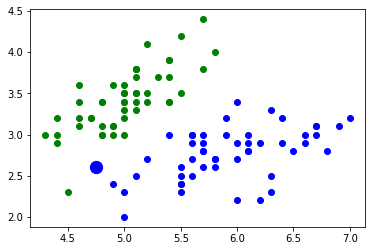

In [9]:
import matplotlib.pyplot as plt
import requests
from pprint import pprint

response = requests.get("https://raw.githubusercontent.com/zhenyachess/artificial_intelligence_methods/main/1/iris.json")
convert = response.json()
print(convert)

def dist(x1, y1, x2, y2):
  return (abs(x1-x2)**2 + abs(y1-y2)**2)**0.5

def predict(x, y, lst):
  return min([[dist(x, y, lst[i][0], lst[i][1]), value[-1]] for i, value in enumerate(lst)], key=lambda x: x[0])[-1]

def predict_k(x, y, k, lst):
  t = sorted([[dist(x, y, lst[i][0], lst[i][1]), value[-1]] for i, value in enumerate(lst)],key=lambda x: x[0])[:k]
  lst = [lst[-1] for lst in t]
  l = len(set(lst))
  d = {elem:0 for elem in set(lst)}
  for elem in lst:
    d[elem] += 1
  return int(max(d, key=lambda _x: d[_x]))

for lst in convert:
  if lst[-1] == 0:
    plt.scatter(lst[0], lst[1], c='g')
  else:
    plt.scatter(lst[0], lst[1], c='b')  

x_new = 4.75
y_new = 2.6

if predict_k(x_new, y_new, 3, convert) == 0:
  plt.scatter(x_new, y_new, c='g', s=150)
else:
  plt.scatter(x_new, y_new, c='b', s=150)

plt.show()

In [10]:
def quality_prediction(convert):
  good = 0
  for i in range(len(convert)-1):
    t_list = convert[:i] + convert[i+1:]
    if predict(convert[i][0], convert[i][1], t_list) == convert[i][-1]:
      good += 1
  return good/len(convert)

In [11]:
def k_quality_prediction(k, convert):
  good = 0
  for i in range(len(convert)-1):
    t_list = convert[:i] + convert[i+1:]
    if predict_k(convert[i][0], convert[i][1], k, t_list) == convert[i][-1]:
      good += 1
  return good/len(convert)

In [12]:
print(quality_prediction(convert))

0.98


In [13]:
for k in range(1, len(convert)):
    print("{}k-test: {}".format(k, k_quality_prediction(k, convert)))

1k-test: 0.98
2k-test: 0.98
3k-test: 0.98
4k-test: 0.98
5k-test: 0.98
6k-test: 0.98
7k-test: 0.98
8k-test: 0.99
9k-test: 0.99
10k-test: 0.99
11k-test: 0.99
12k-test: 0.99
13k-test: 0.99
14k-test: 0.99
15k-test: 0.99
16k-test: 0.99
17k-test: 0.99
18k-test: 0.99
19k-test: 0.99
20k-test: 0.99
21k-test: 0.99
22k-test: 0.98
23k-test: 0.99
24k-test: 0.98
25k-test: 0.99
26k-test: 0.98
27k-test: 0.98
28k-test: 0.98
29k-test: 0.98
30k-test: 0.98
31k-test: 0.98
32k-test: 0.98
33k-test: 0.98
34k-test: 0.98
35k-test: 0.99
36k-test: 0.99
37k-test: 0.99
38k-test: 0.98
39k-test: 0.99
40k-test: 0.99
41k-test: 0.99
42k-test: 0.99
43k-test: 0.99
44k-test: 0.98
45k-test: 0.99
46k-test: 0.98
47k-test: 0.98
48k-test: 0.98
49k-test: 0.98
50k-test: 0.95
51k-test: 0.96
52k-test: 0.96
53k-test: 0.97
54k-test: 0.94
55k-test: 0.95
56k-test: 0.95
57k-test: 0.95
58k-test: 0.94
59k-test: 0.94
60k-test: 0.94
61k-test: 0.94
62k-test: 0.94
63k-test: 0.95
64k-test: 0.94
65k-test: 0.94
66k-test: 0.94
67k-test: 0.94
68k-